In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import normalize

from matplotlib.backends.backend_pdf import PdfPages

from errno import EEXIST
from os import makedirs,path

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['font.size'] = 10
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

In [3]:
datasets = ["50words", "Adiac", "ArrowHead", "Beef", "BeetleFly", "BirdChicken", "Car", "CBF", "ChlorineConcentration", "CinC", "Coffee", "Computers", "Cricket", "DiatomSizeReduction", "DistalPhalanxOutlineAgeGroup", "DistalPhalanxOutlineCorrect", "DistalPhalanxTW", "Earthquakes", "ECG200", "ECG5000", "ECGFiveDays", "ElectricDevices", "FaceAll", "FaceFour", "FacesUCR", "FISH", "FordA", "FordB", "Gun", "Ham", "HandOutlines", "Haptics", "Herring", "InlineSkate", "InsectWingbeatSound", "ItalyPowerDemand", "LargeKitchenAppliances", "Lighting2", "Lighting7", "MALLAT", "Meat", "MedicalImages", "MiddlePhalanxOutlineAgeGroup", "MiddlePhalanxOutlineCorrect", "MiddlePhalanxTW", "MoteStrain", "NonInvasiveFatalECG", "OliveOil", "OSULeaf", "PhalangesOutlinesCorrect", "Phoneme", "Plane", "ProximalPhalanxOutlineAgeGroup", "ProximalPhalanxOutlineCorrect", "ProximalPhalanxTW", "RefrigerationDevices", "ScreenType", "ShapeletSim", "ShapesAll", "SmallKitchenAppliances", "SonyAIBORobotSurface", "SonyAIBORobotSurfaceII", "StarLightCurves", "Strawberry", "SwedishLeaf", "Symbols", "synthetic", "ToeSegmentation1", "ToeSegmentation2", "Trace", "TwoLeadECG", "Two", "UWaveGestureLibraryAll", "uWaveGestureLibrary", "wafer", "Wine", "WordsSynonyms", "Worms", "WormsTwoClass", "yoga"]

In [4]:
def get_baseline_KvLBR(date):
    for root,_, files in os.walk("../baselineExperiments/{}/KvLBR".format(date)):
        return [os.path.join(root, name) for name in files]
    
def get_baseline_KvTime(date):
    for root,_, files in os.walk("../baselineExperiments/{}/KvTime".format(date)):
        return [os.path.join(root, name) for name in files]

def get_spectrum():
    for root,_, files in os.walk("../baselineExperiments/spectrum"):
        return [os.path.join(root, name) for name in files]
    
def get_LBRvTime(date):
    for root,_, files in os.walk("../LBRvTimeExperiments/{}".format(date)):
        return [os.path.join(root, name) for name in files]
    
def get_obj_KEXPvK(date):
    for root,_, files in os.walk("../ObjectiveFuncExperiments/{}/KEXPvK".format(date)):
        return [os.path.join(root, name) for name in files]

def get_obj_KEXPvTime(date):
    for root,_, files in os.walk("../ObjectiveFuncExperiments/{}/KEXPvTime".format(date)):
        return [os.path.join(root, name) for name in files]
    
def get_obj_val(date):
    for root,_, files in os.walk("../ObjectiveFuncExperiments/{}/objValue".format(date)):
        return [os.path.join(root, name) for name in files]
    
def get_SVD_MDTime(date):
    for root,_, files in os.walk("../SVDExperiments/{}/MDtimeEst".format(date)):
        return [os.path.join(root, name) for name in files]    

def get_SVD_NTvK(date):
    for root,_, files in os.walk("../SVDExperiments/{}/NTvK".format(date)):
        return [os.path.join(root, name) for name in files]   

In [5]:
def get_name(f):
    fn = f.split("/")[-1]
    return fn.split(".csv")[0]

def split_baseline(f):
    fn = f.split("_")
    hour = fn[0]
    minute = fn[1]
    data = fn[2]
    q = fn[3][1:]
    method = fn[4]
    return hour,minute,data,q,method

def split_spectrum(f):
    fn = f.split("_")
    data = fn[0]
    return data
    
def split_LBRvTime(f):
    fn = f.split("_")
    hour = fn[0]
    minute = fn[1]
    data = fn[2]
    algo = fn[3]
    q =  fn[4][1:]
    kexp = fn[5][4:]
    work = fn[6]
    return hour,minute,data,algo,q,kexp,work
    
def split_obj_kexp(f):
    fn = f.split("_")
    hour = fn[0]
    minute = fn[1]
    data = fn[2]
    algo = fn[3]
    lbr = fn[4][3:]
    q =  fn[5][1:]
    work = fn[6]
    return hour,minute,data,algo,lbr,q,work

def split_obj_val(f):
    fn = f.split("_")
    hour = fn[0]
    minute = fn[1]
    data = fn[2]
    lbr = fn[3][3:]
    q =  fn[4][1:]
    kexp = fn[5][4:]
    algo = fn[6]
    work = fn[7]
    flag = fn[8]
    return hour,minute,data,lbr,q,kexp,algo,work,flag

def split_SVD(f):
    fn = f.split("_")
    hour = fn[0]
    minute = fn[1]
    data = fn[2]
    lbr = fn[3][3:]
    q =  fn[4][1:]
    kexp = fn[5][4:]
    work = fn[6]
    return hour,minute,data,lbr,q,kexp,work


In [6]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''
    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

def plot_sort_by_key_single(data,title,xlabel,ylabel):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def plot_spectrum(data,cutoff):
    x = np.linspace(0.01,1,100)
    norm_data = data/np.sum(data)
    interped = np.interp(x, np.array(range(1,data.shape[0]+1))/float(data.shape[0]),norm_data)
    plt.plot(x,interped)
    return interped

def plot_raw_spectrum(data, title):
    norm_data = data/np.sum(data)
    x = np.array(range(1,data.shape[0]+1))/float(data.shape[0])
    plt.plot(x,norm_data)    
    plt.title(title)

def plot_interp_spectrum(data, title):
    x = np.linspace(0.001,1,100)
    norm_data = data/np.sum(data)
    x = np.array(range(1,data.shape[0]+1))/float(data.shape[0])
    plt.plot(x,np.interp(x, np.array(range(1,data.shape[0]+1))/float(data.shape[0]),norm_data))    
    plt.title(title)
    

    

In [7]:
today = '05-01'
yesterday = '05-02'

# Baseline Plots

## K v Time

In [ ]:
def plot_sort_by_key_single(data,title,xlabel,ylabel):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

full_files = get_baseline_KvTime(yesterday)
files = [get_name(f) for f in full_files]

prev_data = ""
legend = []
handle = plt.figure()
for f, name in zip(full_files,files):
    meta_data = split_baseline(name)
    if prev_data != meta_data[2]:
        plt.legend(legend)
        handle.savefig("../baselineExperiments/{}/KvTime/plots/{}.pdf".format(yesterday,prev_data))
        handle = plt.figure()
        prev_data = meta_data[2]
    legend += [meta_data[4]]
    data = np.loadtxt(f, delimiter=',') 
    sorted_data = data[np.argsort(data[:,0])]
    fit_time = sorted_data[0,1]
    proc_data = sorted_data[1:,:]
    proc_data[:,1] += fit_time
    plot_sort_by_key_single(proc_data,meta_data[2],'K', 'time')

## K v LBR

In [ ]:
full_files = get_baseline_KvLBR(yesterday)
files = [get_name(f) for f in full_files]

prev_data = ""
legend = []
handle = plt.figure()
for f, name in zip(full_files,files):
    meta_data = split_baseline(name)
    if meta_data[4] == "RP":
        continue
    if prev_data != meta_data[2]:
        plt.legend(legend)
        handle.savefig("../baselineExperiments/{}/KvLBR/plots/{}.pdf".format(yesterday,prev_data))
        handle = plt.figure()
        prev_data = meta_data[2]
    legend += [meta_data[4]]
    data = np.loadtxt(f, delimiter=',') 
    plot_sort_by_key_single(data,meta_data[2],'K', 'LBR')

# Spectrum Plots

In [ ]:
full_files = get_spectrum()
files = [get_name(f) for f in full_files]
interped = []
handle = plt.figure()
for f, name in zip(full_files,files):
    data = np.loadtxt(f, delimiter=',') 
    interped.append(plot_spectrum(data,25))
plt.title("All Normalized")
handle.savefig("../baselineExperiments/spectrum/plots/all_normalized.pdf")

thing = np.concatenate(interped).reshape([len(interped),-1])
handle=plt.figure()
plt.plot(np.linspace(0.001,1,100),thing.T, color='lightgrey')
plt.plot(np.linspace(0.001,1,100),np.percentile(thing,50,axis=0), color='#5f81e4')
plt.plot(np.linspace(0.001,1,100),np.percentile(thing,25,axis=0), '--', color='c')
plt.plot(np.linspace(0.001,1,100),np.percentile(thing,75,axis=0),'--', color='c')
plt.title("All Normalized")
handle.savefig("../baselineExperiments/spectrum/plots/all_normalized_greyed.pdf")



for f, name in zip(full_files,files):
    dname = name.split('_')[0]
    data = np.loadtxt(f, delimiter=',') 
    handle = plt.figure()
    plot_raw_spectrum(data,dname)
    handle.savefig("../baselineExperiments/spectrum/plots/{}.pdf".format(dname))

# SVD MicDrop Base Plots

## Nt against Actual vs Estimated Nt Time

In [ ]:
date = '05-21'
def plot_Nt_by_time(data,title,xlabel,ylabel):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1],label='true', marker='o')
    plt.plot(sorted_data[:,0],sorted_data[:,2],label='predicted', marker='o')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

full_files = get_SVD_MDTime(date)
files = [get_name(f) for f in full_files]
savef = "../SVDExperiments/{}/MDtimeEst/plots/".format(date)
mkdir_p(savef)
for f, name in zip(full_files,files):
    data = np.loadtxt(f, delimiter=',') 
    handle = plt.figure()
    plot_Nt_by_time(data,name,'Nt', 'time')
    handle.savefig(savef+name+".pdf")
    plt.close()


## Nt vs K

15_34_50words_lbr0.98_q1.96_kexp2_NOREUSE_NOOPTIMIZE 20
[[  45.   27.]
 [  90.   25.]
 [ 135.   24.]
 [ 180.   23.]
 [ 225.   23.]
 [ 270.   22.]
 [ 315.   22.]
 [ 360.   22.]
 [ 405.   22.]
 [ 450.   21.]
 [ 495.   21.]
 [ 540.   21.]
 [ 585.   21.]
 [ 630.   21.]
 [ 675.   21.]
 [ 720.   21.]
 [ 765.   21.]
 [ 810.   21.]
 [ 855.   21.]
 [ 900.   21.]]
15_35_Adiac_lbr0.98_q1.96_kexp2_NOREUSE_NOOPTIMIZE 20
[[  39.   21.]
 [  78.   19.]
 [ 117.   18.]
 [ 156.   17.]
 [ 195.   17.]
 [ 234.   16.]
 [ 273.   16.]
 [ 312.   16.]
 [ 351.   16.]
 [ 390.   16.]
 [ 429.   16.]
 [ 468.   16.]
 [ 507.   16.]
 [ 546.   16.]
 [ 585.   16.]
 [ 624.   16.]
 [ 663.   16.]
 [ 702.   16.]
 [ 741.   16.]
 [ 780.   15.]]
15_36_ArrowHead_lbr0.98_q1.96_kexp2_NOREUSE_NOOPTIMIZE 21
[[  10.    9.]
 [  20.   19.]
 [  30.   29.]
 [  40.   37.]
 [  50.   29.]
 [  60.   26.]
 [  70.   24.]
 [  80.   23.]
 [  90.   22.]
 [ 100.   22.]
 [ 110.   22.]
 [ 120.   21.]
 [ 130.   21.]
 [ 140.   20.]
 [ 150.   20.]
 [ 16

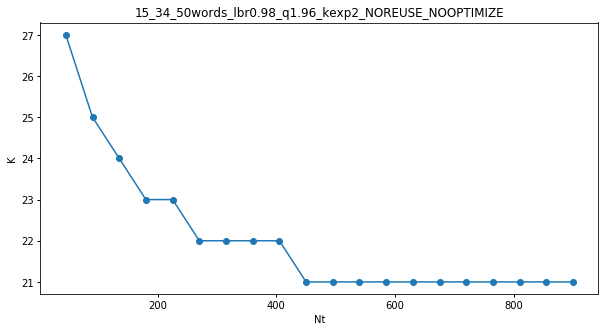

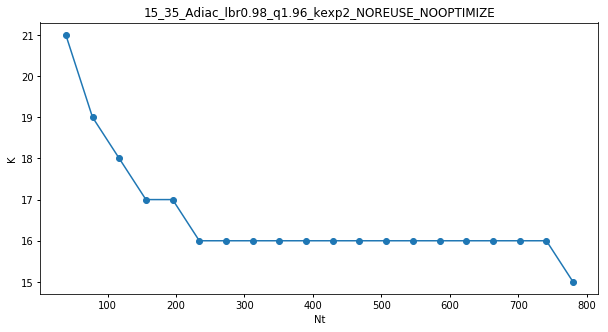

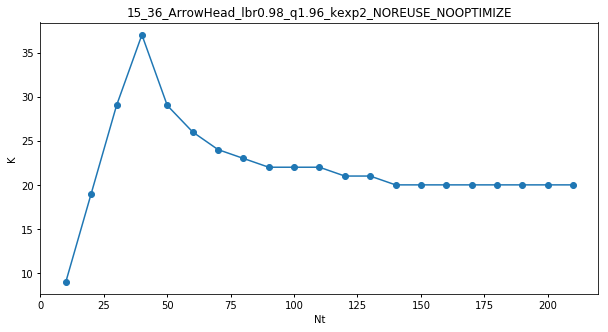

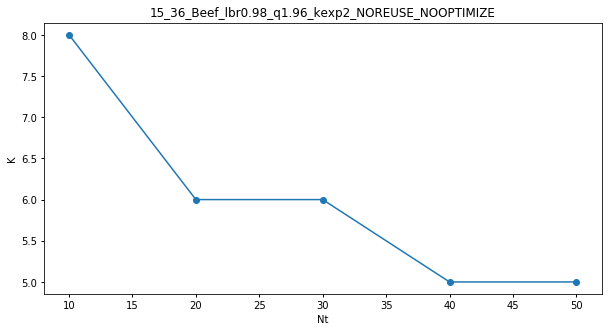

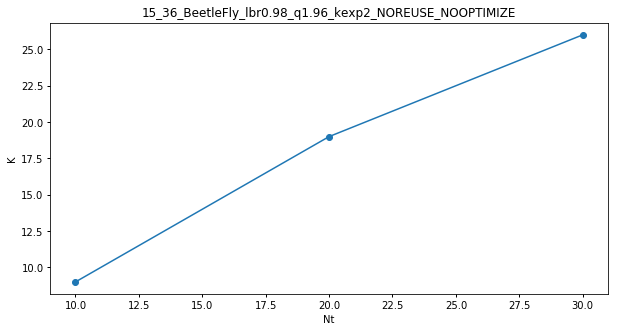

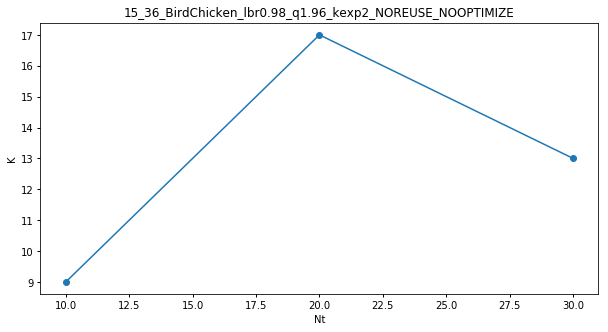

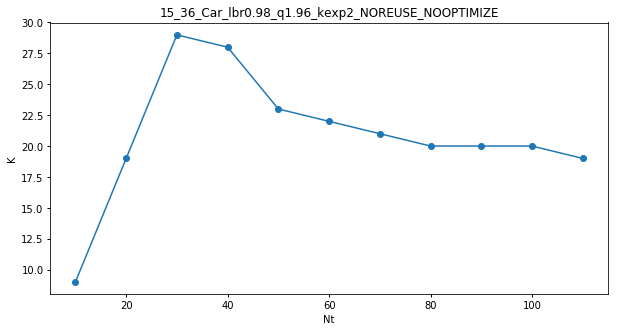

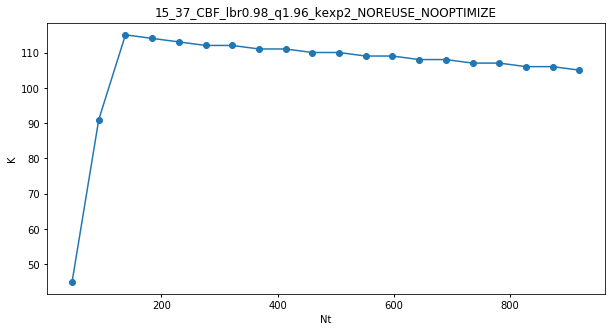

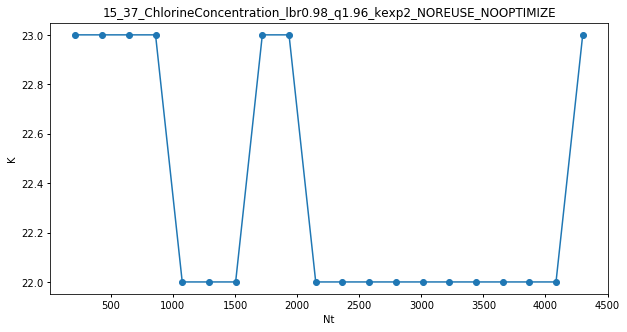

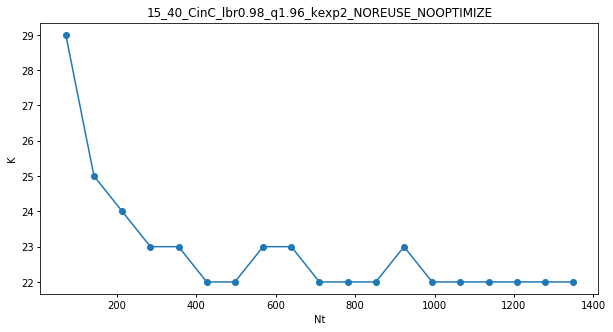

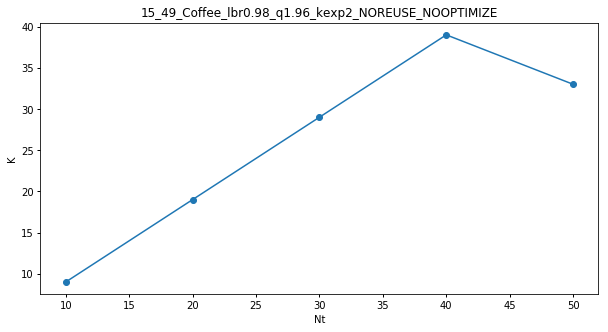

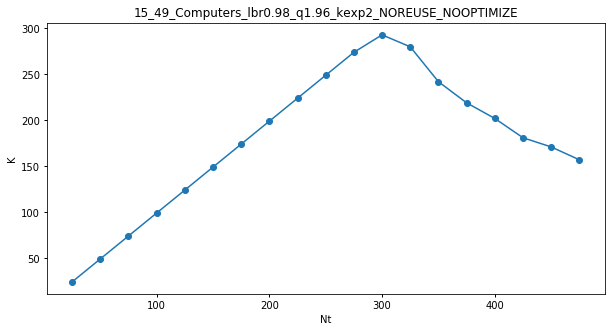

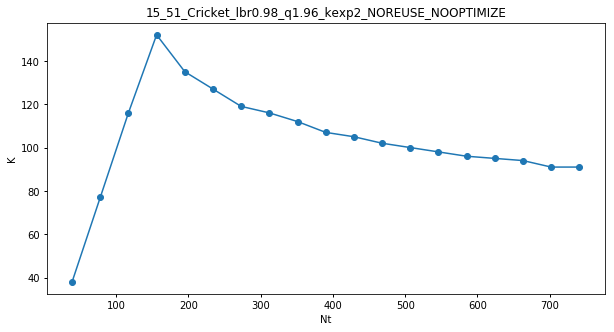

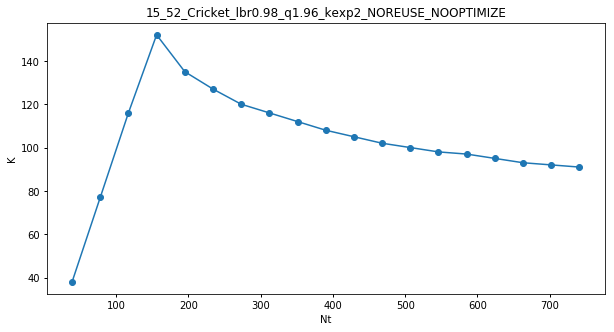

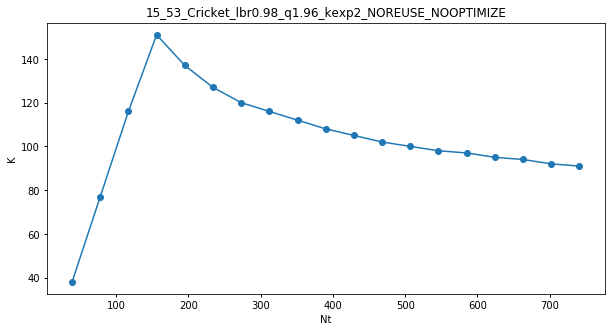

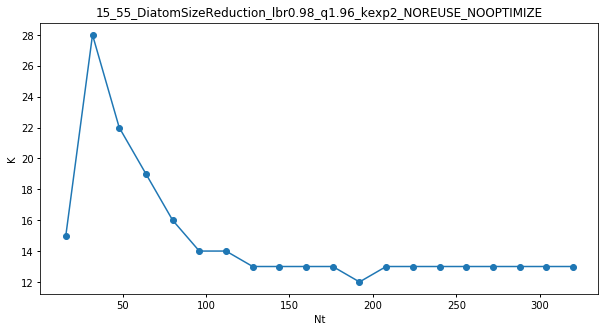

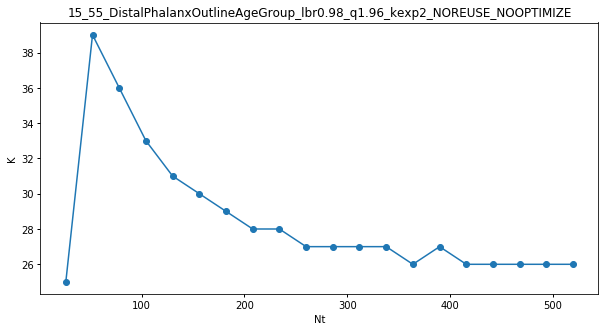

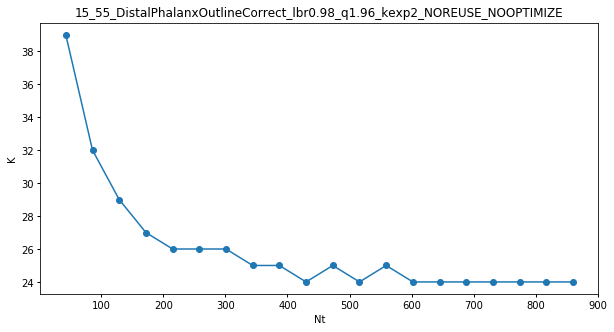

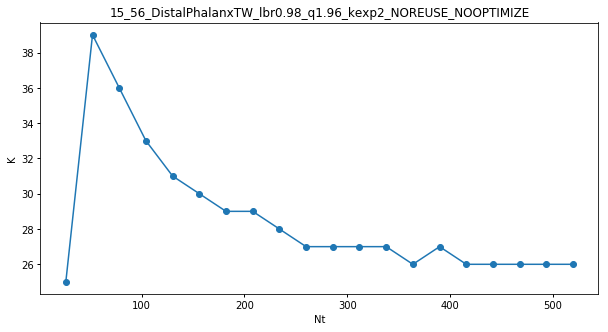

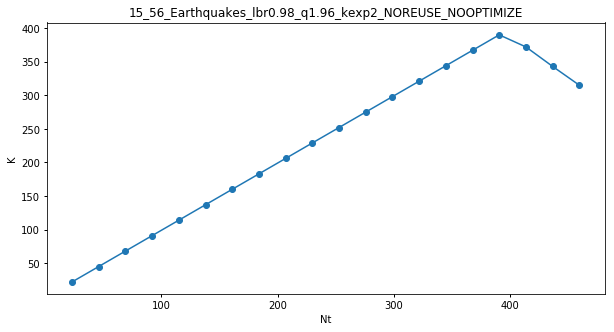

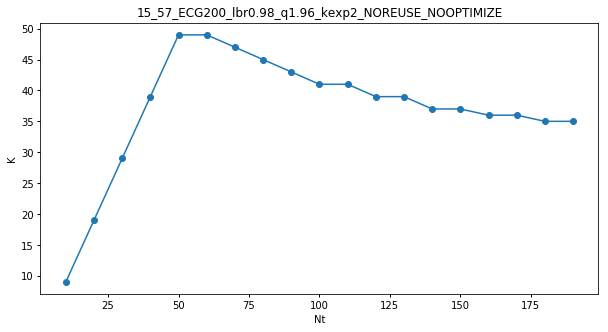

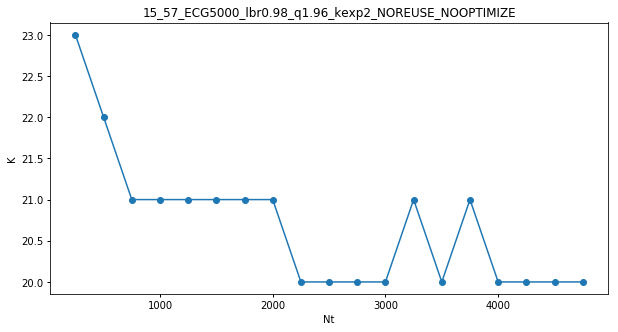

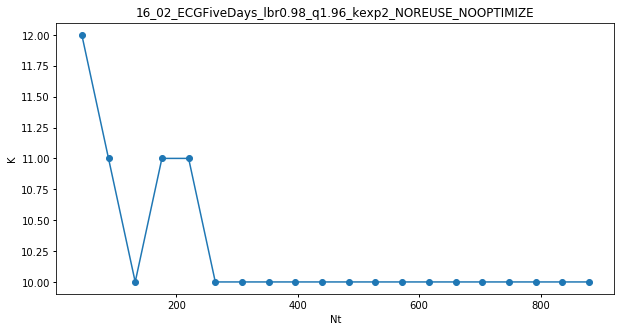

In [12]:
def plot_sort_by_key_single(data,title,xlabel,ylabel):
    sorted_data = data[np.argsort(data[:,0])]
    print title, sorted_data.shape[0]
    print sorted_data
    plt.plot(sorted_data[:,0],sorted_data[:,1], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

date = '05-23'

full_files = get_SVD_NTvK(date)
files = [get_name(f) for f in full_files]
savef = "../SVDExperiments/{}/NTvK/plots/".format(date)
mkdir_p(savef)
for f, name in zip(full_files,files):
    data = np.loadtxt(f, delimiter=',') 
    handle = plt.figure()
    plot_sort_by_key_single(data,name,"Nt", "K")
    #handle.savefig(savef+name+".pdf")
    #plt.close()

# LBR vs Time Plots

In [ ]:
date = '05-21'
def plot_LBRvTime(data, algo, work):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1], label=algo+"_"+work, marker='o')
c = plt.cm.Paired(np.linspace(0,1,12))

algos = ['SVD', 'TROPP', 'FAST']
works = ['REUSE', 'NOREUSE']
full_files = get_LBRvTime(date)
for d in datasets[:8]:
    handle = plt.figure()
    plt.gca().set_color_cycle(c)
    plt.hold(True)
    for algo in algos:
        for work in works:
            dfiles = filter(lambda x: work == split_LBRvTime(get_name(x))[6],filter(lambda x: algo == split_LBRvTime(get_name(x))[3], filter(lambda x: d == split_LBRvTime(get_name(x))[2], full_files)))
            f = dfiles[0]
            data = np.loadtxt(f, delimiter=',') 
            plot_LBRvTime(data,algo,work)
    plt.title(d)
    plt.xlabel("LBR")
    plt.ylabel("Total Time")
    plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    #handle.savefig("../LBRvTimeExperiments/{}/plots/{}.pdf".format(date,d), bbox_inches='tight')
    #plt.close()

    
date = '05-22'
def plot_LBRvTime(data, algo, work):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1], label=algo+"_"+work, marker='o')
c = plt.cm.Paired(np.linspace(0,1,12))

algos = ['SVD', 'TROPP', 'FAST']
works = ['REUSE', 'NOREUSE']
full_files = get_LBRvTime(date)
for d in datasets[8:]:
    handle = plt.figure()
    plt.gca().set_color_cycle(c)
    plt.hold(True)
    for algo in algos:
        for work in works:
            dfiles = filter(lambda x: work == split_LBRvTime(get_name(x))[6],filter(lambda x: algo == split_LBRvTime(get_name(x))[3], filter(lambda x: d == split_LBRvTime(get_name(x))[2], full_files)))
            f = dfiles[0]
            data = np.loadtxt(f, delimiter=',') 
            plot_LBRvTime(data,algo,work)
    plt.title(d)
    plt.xlabel("LBR")
    plt.ylabel("Total Time")
    plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    #handle.savefig("../LBRvTimeExperiments/{}/plots/{}.pdf".format(date,d), bbox_inches='tight')
    #plt.close()

# Objective Function Plots

In [ ]:
datasets = ["50words", "Adiac", "ArrowHead", "Beef", "BeetleFly", "BirdChicken", "Car", "CBF", "ChlorineConcentration", "CinC", "Coffee", "Cricket", "DiatomSizeReduction", "DistalPhalanxOutlineAgeGroup", "DistalPhalanxOutlineCorrect", "DistalPhalanxTW", "Earthquakes", "ECG200", "ECG5000", "ECGFiveDays", "ElectricDevices", "FaceAll", "FaceFour", "FacesUCR", "FISH", "FordA", "FordB", "Gun", "Ham", "HandOutlines", "Haptics", "Herring", "InlineSkate", "InsectWingbeatSound", "ItalyPowerDemand", "LargeKitchenAppliances", "Lighting2", "Lighting7", "MALLAT", "Meat", "MedicalImages", "MiddlePhalanxOutlineAgeGroup", "MiddlePhalanxOutlineCorrect", "MiddlePhalanxTW", "MoteStrain", "NonInvasiveFatalECG", "OliveOil", "OSULeaf", "PhalangesOutlinesCorrect", "Phoneme", "Plane", "ProximalPhalanxOutlineAgeGroup", "ProximalPhalanxOutlineCorrect", "ProximalPhalanxTW", "RefrigerationDevices", "ScreenType", "ShapeletSim", "ShapesAll", "SmallKitchenAppliances", "SonyAIBORobotSurface", "SonyAIBORobotSurfaceII", "StarLightCurves", "Strawberry", "SwedishLeaf", "Symbols", "synthetic", "ToeSegmentation1", "ToeSegmentation2", "Trace", "TwoLeadECG", "Two", "UWaveGestureLibraryAll", "uWaveGestureLibrary", "wafer", "Wine", "WordsSynonyms", "Worms", "WormsTwoClass", "yoga"]

## K exponent vs K

In [ ]:
date = '05-21'
def plot_obj_kexp(data, algo, work):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1], label=algo+"_"+work, marker='o')
c = plt.cm.Paired(np.linspace(0,1,12))

algos = ['SVD', 'TROPP', 'FAST']
works = ['REUSE', 'NOREUSE']
full_files = get_obj_KEXPvK(date)
#files = [get_name(f) for f in full_files]
savef = "../ObjectiveFuncExperiments/{}/KEXPvK/plots/".format(date)
mkdir_p(savef)
for d in datasets[:11] + datasets[12:55] + datasets[56:]:
    handle = plt.figure()
    plt.gca().set_color_cycle(c)
    plt.hold(True)
    for algo in algos:
        for work in works:
            dfiles = filter(lambda x: work == split_obj_kexp(get_name(x))[6],filter(lambda x: algo == split_obj_kexp(get_name(x))[3], filter(lambda x: d == split_obj_kexp(get_name(x))[2], full_files)))
            f = dfiles[0]
            data = np.loadtxt(f, delimiter=',') 
            plot_obj_kexp(data,algo,work)
    plt.title(d)
    plt.xlabel("Kexp")
    plt.ylabel("K")
    plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    #handle.savefig("{}.pdf".format(d), bbox_inches='tight')
    #plt.close()

## K exponent vs Total Runtime

In [ ]:
date = '05-21'
def plot_obj_kexp(data, algo, work):
    sorted_data = data[np.argsort(data[:,0])]
    plt.plot(sorted_data[:,0],sorted_data[:,1], label=algo+"_"+work,marker='o')
c = plt.cm.Paired(np.linspace(0,1,12))
    
algos = ['SVD', 'TROPP', 'FAST']
works = ['REUSE', 'NOREUSE']
full_files = get_obj_KEXPvTime(date)
#files = [get_name(f) for f in full_files]
savef = "../ObjectiveFuncExperiments/{}/KEXPvTime/plots/".format(date)
mkdir_p(savef)
for d in datasets[:11] + datasets[12:55] + datasets[56:]:
    handle = plt.figure()
    plt.gca().set_color_cycle(c)
    plt.hold(True)
    for algo in algos:
        for work in works:
            dfiles = filter(lambda x: work == split_obj_kexp(get_name(x))[6],filter(lambda x: algo == split_obj_kexp(get_name(x))[3], filter(lambda x: d == split_obj_kexp(get_name(x))[2], full_files)))
            f = dfiles[0]
            data = np.loadtxt(f, delimiter=',') 
            plot_obj_kexp(data,algo,work)
    plt.title(d)
    plt.xlabel("Kexp")
    plt.ylabel("Total Runtime")
    plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    #handle.savefig(savef+"{}.pdf".format(d), bbox_inches='tight')
    #plt.close()

## Nt against Actual vs Estimated Objective

In [ ]:
date = '05-21'
def plot_obj_val(data_true, data_pred, algo, work):
    sorted_data_true = data_true[np.argsort(data_true[:,0])]
    sorted_data_pred = data_pred[np.argsort(data_pred[:,0])]
    plt.semilogy(sorted_data_true[:,0],sorted_data_true[:,1], label="true "+algo+"_"+work,marker='o')
    plt.semilogy(sorted_data_pred[:,0],sorted_data_pred[:,1], label="predicted "+algo+"_"+work,marker='o')
    
c = plt.cm.Paired(np.linspace(0,1,12))

algos = ['SVD', 'TROPP', 'FAST']
works = ['REUSE', 'NOREUSE']
Kexps = ['1','2','3']
full_files = get_obj_val(date)
#files = [get_name(f) for f in full_files]
savef = "../ObjectiveFuncExperiments/{}/objValue/plots/".format(date)
mkdir_p(savef)
for d in datasets[:11] + datasets[12:55] + datasets[56:]:
    for Kexp in Kexps:
        handle = plt.figure()
        plt.gca().set_color_cycle(c)
        plt.hold(True)
        for algo in algos:
            for work in works:
                dfiles = filter(lambda x: algo == split_obj_val(get_name(x))[6], filter(lambda x: d == split_obj_val(get_name(x))[2], full_files))
                dfiles = filter(lambda x: Kexp == split_obj_val(get_name(x))[5],filter(lambda x: work == split_obj_val(get_name(x))[7],dfiles))
                
                ftrue = filter(lambda x: 'true.csv' in x, dfiles)[0]
                fpred = filter(lambda x: 'predicted.csv' in x, dfiles)[0]
                
                data_true = np.loadtxt(ftrue, delimiter=',') 
                data_pred = np.loadtxt(fpred, delimiter=',') 
                
                plot_obj_val(data_true, data_pred, algo, work)
        plt.title(d+" Kexp:"+Kexp)
        plt.xlabel("Nt")
        plt.ylabel("Objective")
        plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
        handle.savefig(savef+"{}_kexp{}.pdf".format(d,Kexp), bbox_inches='tight')
        plt.close()